In [1]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
q = sym.symbols("q")         # Символ заряда
ε = sym.symbols("ε")         # Символ диэлектрической проницаемости кремния
ε0 = sym.symbols("ε0")       # Символ диэлектрической постоянной
S = sym.symbols("S")         # Символ площади
φ = sym.symbols("φ")         # Символ угла
E0 = 8.85e-12                # Ф/см - диэлектрическая постоянная
Es = 12                      # Диэлектрическая проницаемость кремния
qq  = 1.6e-19                # Кл - элементарный заряд
Ss = 5                       # мм^2 - Площадь 
fi = 0.73                    # Угол наклона
Sd = 1                       # см - деление линейки
fid  = 0.035                 # неопределенность угла

Модель измерений

In [3]:
N = -2/(q*ε*ε0*S**2*sym.tan(φ))
display(N)

-2/(S**2*q*ε*ε0*tan(φ))

In [4]:
data = {"Входные перменные": ["q", "ε", "ε0","S","φ"],"μ": [qq, Es, E0,Ss,fi],"Тип А": ["-", "-", "-","-",fid],"Распределение А": ["-", "-", "-","-","Нормальное"],"Тип B": ["-", "-", "-",0.02,"-"],"Распределение B": ["-", "-", "-","Равномерное","-"]}
data_pandas = pd.DataFrame(data)
data_pandas 

,Входные перменные,μ,Тип А,Распределение А,Тип B,Распределение B
0,q,1.600000e-19,-,-,-,-
1,ε,1.200000e+01,-,-,-,-
2,ε0,8.850000e-12,-,-,-,-
3,S,5.000000e+00,-,-,0.02,Равномерное
4,φ,7.300000e-01,0.035,Нормальное,-,-


Вычисление погрешности площади 

In [5]:
Sdu=Sd/2              # Погрешность линейки

Так как площадь вычислялась то для ее неопределенности необходимо использовать формулу расчета косвенных погрешностей

In [6]:
Su=np.sqrt((2*np.sqrt(Ss))**2*(Sdu)**2)
print("Значение погрешности площади:",'%.2f'%Su)

Значение погрешности площади: 2.24


Расчет суммарной погрешности

In [7]:
Ns = sym.diff(N,S)                                                      # Расчет частной производной по S
display('Частная производная по S :',Ns)
CS = 4/(Ss**3*qq*Es*E0*1e12*np.tan(fi))                                 # Коэффициент чувствительности
Nfi = sym.diff(N,φ )                                                    # Расчет частной производной по φ 
display("Частная производная по φ :",Nfi)
Cfi = -2*(-(np.tan(fi))**2-1)/(Ss**2*1e12*qq*Es*E0*(np.tan(fi)**2))     # Коэффициент чувствительности

uc = np.sqrt((CS**2)*(Sdu**2)+(Cfi**2)*(fid**2))                        # Суммарная неопределённость 
print("Значение суммарной неопределённости  :",'%.2f'%(uc/1e15),"* e15")

'Частная производная по S :'

4/(S**3*q*ε*ε0*tan(φ))

'Частная производная по φ :'

-2*(-tan(φ)**2 - 1)/(S**2*q*ε*ε0*tan(φ)**2)

Значение суммарной неопределённости  : 1.12 * e15


Расчет степени свободы

In [8]:
v=(uc)**4/((Sdu**4)/1+(fid**4)/9)*1e-60
print("Так как",'%.2f'%v,"* 1e60 >>30 то k =2.04")

Так как 24.78 * 1e60 >>30 то k =2.04


In [9]:
NN = -2/(Ss**2*qq*1e12*E0*Es*np.tan(-fi))
U95=2.04*uc
print("Расширенная неопределённость при вероятности охвата 95%:",'%.2f'%(U95/1e15),"*e16")
U9=U95/NN*100
print("Итоговый результат :",'%.2f'%(NN/1e15),"±",'%.2f'%(U95/1e15),"* e15","=",'%.2f'%(NN/1e15),"e15","±",'%.0f'%U9,"%")

Расширенная неопределённость при вероятности охвата 95%: 2.28 *e16
Итоговый результат : 5.26 ± 2.28 * e15 = 5.26 e15 ± 43 %


In [10]:
PS=(CS*Sdu)**2/uc**2*100
print("Вклад погрешности S в общую неопределённость:",'%.2f'%PS,"%")
Pf=(Cfi*fid)**2/uc**2*100
print("Вклад погрешности φ в общую неопределённость:",'%.2f'%Pf,"%")

Вклад погрешности S в общую неопределённость: 88.97 %
Вклад погрешности φ в общую неопределённость: 11.03 %


Метод Монте-Карло для значения угла

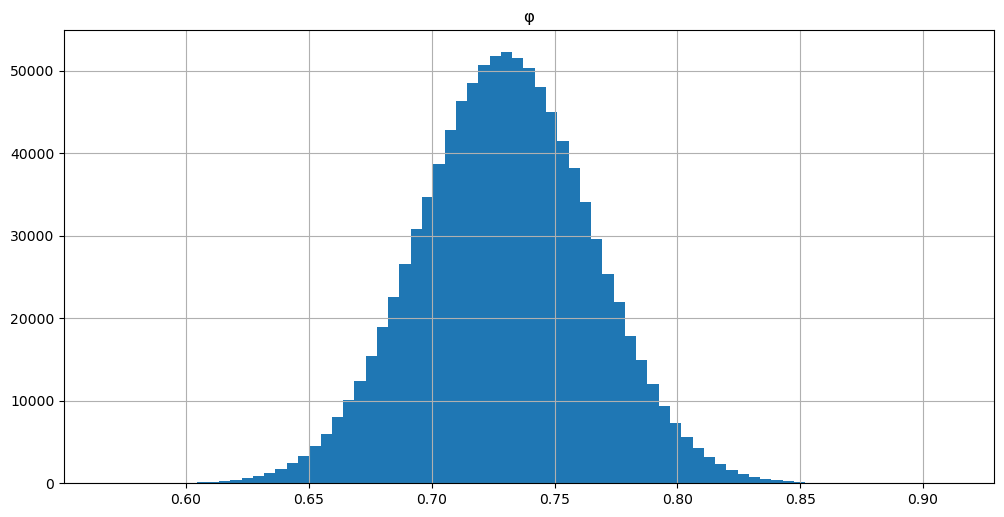

In [11]:
num_reps = 1000000
fimc = np.random.normal(fi, fid, num_reps)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100) 
n, bin, patches = plt.hist(fimc,bins=75)
plt.title('φ')
plt.grid(visible=True)
plt.show()

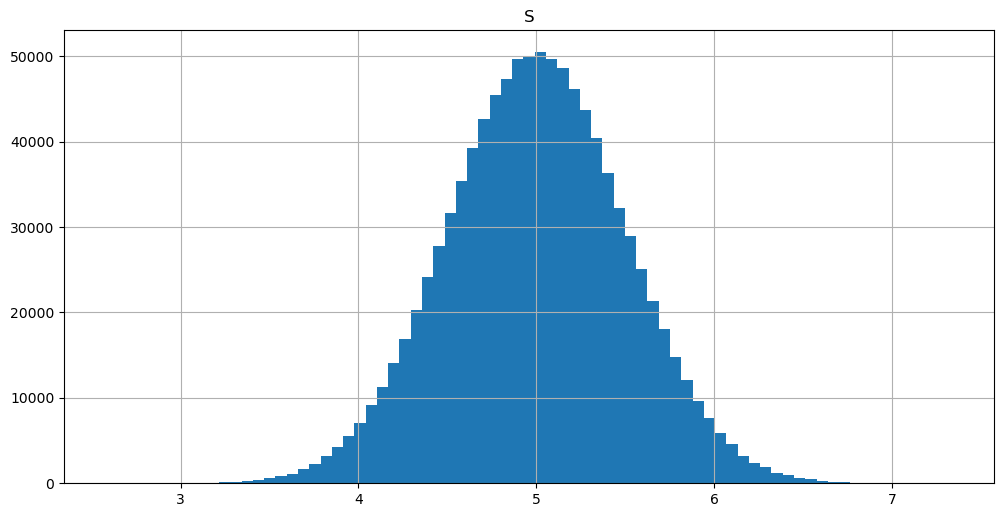

In [12]:
Smc = np.random.normal(Ss, 0.5, num_reps)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)
n, bin, patches = plt.hist(Smc,bins=75)
plt.title('S')
plt.grid(visible=True)
plt.show()

Метод Монте-Карло для удельного сопротивления

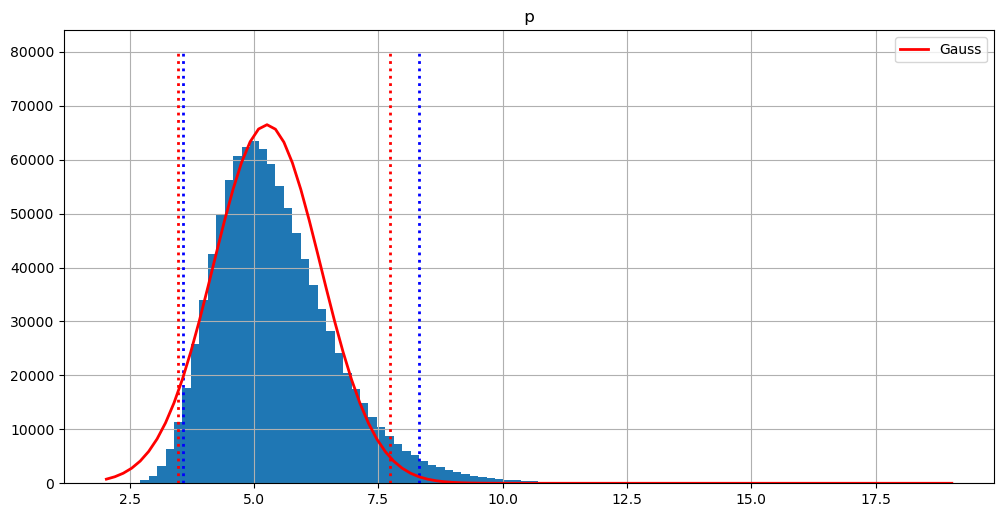

Итоговый результат : 4.92 ± 2.37


In [15]:
mu, sigma = 5.26, 1.08
Nmc=np.zeros(num_reps)
for i in range(num_reps):
    Nmc[i]=-2/(qq*E0*Es*Smc[i]**2*np.tan(-fimc[i])*1e12)*1e-15
   
f1=np.percentile(Nmc,2.5)
f2=np.percentile(Nmc,97.5)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(Nmc,bins=100)
plt.title(' p ')
plt.grid(visible=True)
f6=3.48
f8=7.73
plt.vlines(x = f1, ymin=0, ymax=80000, colors='blue', ls=':', lw=2, )
plt.vlines(x = f2, ymin=0, ymax=80000, colors='blue', ls=':', lw=2, )
plt.vlines(x = f6, ymin=0, ymax=80000, colors='red', ls=':', lw=2, )
plt.vlines(x = f8, ymin=0, ymax=80000, colors='red', ls=':', lw=2, )
plt.plot(bin, 180000/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bin - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r',label='Gauss')
plt.legend()
plt.show()
f11=np.percentile(Nmc,2.5)
f22=np.percentile(Nmc,97.5)
f3=(bin[np.where(n == n.max())])
f4=((f2-f1)/2)

print("Итоговый результат :",'%.2f'%f3,"±",'%.2f'%f4)


In [16]:
Nmc1=np.zeros(num_reps)
for i in range(num_reps):
    Nmc1[i]=-2/(qq*E0*Es*Smc[i]**2*np.tan(-fi)*1e12)*1e-15
f1=np.percentile(Nmc1,2.5)
f2=np.percentile(Nmc1,97.5)
f5=(((f2-f1)/2)**2)/(f4**2)*100
print("Вклад погрешности S в общую неопределённость:",'%.2f'%f5,"%")


Вклад погрешности S в общую неопределённость: 88.85 %


In [17]:
Nmc2=np.zeros(num_reps)
for i in range(num_reps):
    Nmc2[i]=-2/(qq*E0*Es*Ss**2*np.tan(-fimc[i])*1e12)*1e-15
f1=np.percentile(Nmc2,2.5)
f2=np.percentile(Nmc2,97.5)
f6=(((f2-f1)/2)**2)/(f4**2)*100
print("Вклад погрешности φ в общую неопределённость:",'%.2f'%f6,"%")


Вклад погрешности φ в общую неопределённость: 9.55 %


In [18]:
data1 = {"Сравнение": ["N", "dN", "CS","Cfi"],"Монте-Карло": [4.77, 2.34, 89,10.75],"GUM": [5.23, 2.28, 89 ,11]}
data_pandas = pd.DataFrame(data1)
data_pandas 

,Сравнение,Монте-Карло,GUM
0,N,4.77,5.23
1,dN,2.34,2.28
2,CS,89.00,89.00
3,Cfi,10.75,11.00


In [19]:
print("Разница между нижними пределами:",abs(f8-f22))
print("Разница между верхними пределами:",abs(f11-f6))
delta=0.5*10
print("Число значащих разрядов",delta)

Разница между нижними пределами: 0.5916628753821609
Разница между верхними пределами: 5.969856128821223
Число значащих разрядов 5.0


Так как разница между границами меньше чем число значащих разрядов то распределение Гаусса соответствует Монте-Карло